In [67]:
# carga de librerías
import numpy as np
import pandas as pd
from ast import literal_eval
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_parquet("datasets/movies_dataset.parquet")
credits = pd.read_parquet("datasets/credits.parquet")

# movies = pd.read_csv("datasets/movies_dataset.csv", low_memory=False)
# credits = pd.read_csv("datasets/credits.csv")

In [3]:
# credits.to_parquet("datasets/credits.parquet")
# movies.to_parquet("datasets/movies.parquet")

In [4]:
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,False,7.7,5415.0


In [5]:
credits.head(1)
# credits["cast"]
# credits["cast"][0]

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [6]:
# función para obtener datos varios de los dataframe(info, describe, null, duplicated)
def print_df_info(df):
    
    print("** Info - Información general **")
    print(df.info())

    print("=======================================================")

    print("** Shape **")
    print(f"Filas: {df.shape[0]} - Columnas: {df.shape[1]}")

    print("=======================================================")

    print("** Describe - Estadísticas resumidas **")
    print(df.describe().T)

    print("=======================================================")

    print("** NaN - Nulos **")
    print(df.isna().sum())

    print("=======================================================")
    print("** Duplicated - Duplicados **")
    print(df.duplicated().sum())

In [7]:
print_df_info(movies)

** Info - Información general **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date         

In [8]:
print_df_info(credits)

** Info - Información general **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None
** Shape **
Filas: 45476 - Columnas: 3
** Describe - Estadísticas resumidas **
      count           mean            std  min       25%      50%       75%  \
id  45476.0  108345.997537  112443.796536  2.0  26443.25  60002.5  157302.0   

         max  
id  469172.0  
** NaN - Nulos **
cast    0
crew    0
id      0
dtype: int64
** Duplicated - Duplicados **
37


**Transformaciones**
* Eliminar las columnas que no serán utilizadas:   
video, imdb_id, adult, original_title, poster_path y homepage.

In [9]:
# eliminar columnas
movies.drop(["adult", "homepage", "imdb_id", "original_title", "popularity", "poster_path", "spoken_languages", "status", "video", "vote_average", "vote_count"], axis=1, inplace=True)

In [10]:
# visualizar columnas restantes
movies.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title'],
      dtype='object')

* **Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.**

In [11]:
# eliminar los duplicados
movies.drop_duplicates(inplace=True)
credits.drop_duplicates(inplace=True)

In [12]:
movies["budget"] = movies["budget"].fillna(0)
movies["revenue"] = movies["revenue"].fillna(0)

Crear la columna con el retorno de inversión, llamada **`return`** con los campos **`revenue`** y **`budget`**, dividiendo estas dos últimas **`revenue / budget`**, cuando no hay datos disponibles para calcularlo, deberá tomar el valor **`0`**.  
Este paso arroja un error ya que la columna budget es de tipo object y revenue es de tipo float, por lo  
que se procedió a cambiar el tipo de dato, paso que también arroja un error porque algunos campos de la columna budget contienen caracteres y números combinados.  
Para solucionar esto se creó una función que devuelva que campos son solo números, solo letras o combinados, luego dependiendo de la cantidad de filas con el problema se procede a eliminarlas.

In [13]:
# determino los tipos de datos
print(movies.budget.dtype)
print(movies.revenue.dtype)

object
float64


In [14]:
# función para determinar cuantas filas de la columna id de movies tienen caracteres, números
# o una combinación de ambos
def get_column_type(str):
  if str.isdigit():
    return "numbers"
  elif str.isalpha():
    return "characters"
  else:
    return "mixed"

In [15]:
# aplicar la función sobre la columna y el resultado en una nueva columna
movies["types"] = movies["budget"].apply(get_column_type)

In [16]:
# visualizo la cantidad de filas con caracteres o con caracteres y números combinados
# en este caso chequeo characters y mixed
# movies[movies["types"] == "characters"].count()
movies[movies["types"] == "mixed"].count()
# movies[movies["types"] == "numbers"].count()

belongs_to_collection    3
budget                   3
genres                   3
id                       3
original_language        3
overview                 3
production_companies     3
production_countries     3
release_date             3
revenue                  3
runtime                  0
tagline                  0
title                    0
types                    3
dtype: int64

In [17]:
# visualizo las filas específicas
movies[movies["types"] == "mixed"]

,belongs_to_collection,budget,genres,id,original_language,overview,production_companies,production_countries,release_date,revenue,runtime,tagline,title,types
19730,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,Released,False,6.0,1,0.0,NaN,None,None,mixed
29503,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,Released,False,7.0,12,0.0,NaN,None,None,mixed
35587,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,Released,False,4.3,22,0.0,NaN,None,None,mixed


In [18]:
# elimino los tres(3) registros por id.
movies = movies.drop([19730, 29503, 35587])

In [19]:
# una vez eliminados se convierte el tipo de dato
movies["budget"] = movies["budget"].astype('float')

In [20]:
print(movies.budget.dtype)

float64


In [21]:
# Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget,
# dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, 
# deberá tomar el valor 0.
movies["return"] = movies["revenue"].where(movies["budget"] != 0) / movies["budget"]
# movies["return"] = movies["revenue"] / movies["budget"]
movies["return"]

0        12.451801
1         4.043035
2              NaN
3         5.090760
4              NaN
           ...    
45461          NaN
45462          NaN
45463          NaN
45464          NaN
45465          NaN
Name: return, Length: 45433, dtype: float64

In [22]:
# elimino la columna types(tipos)
movies.drop(["types"], axis=1, inplace=True)

In [23]:
# visualizar las columnas restantes
movies.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'return'],
      dtype='object')

* **Los valores nulos del campo release date deben eliminarse.**

In [24]:
# conteo de nulos de la columna
print(movies["release_date"].isnull().sum())

# eliminar nulos
movies.dropna(subset=["release_date"], inplace = True)

# conteo de nulos
print(movies["release_date"].isnull().sum())

87
0


De haber fechas, deberán tener el formato **`AAAA-mm-dd`**, además deberán crear la columna **`release_year`** donde extraerán el año de la fecha de estreno.  
la columna release_date al convertirla al formato datetime presentó problemas, para solucionar se creó una función   para extraer las fechas y limpiar las cadenas ya que la columna es de tipo object

In [25]:
fechas = movies["release_date"].to_list()
fechas2 = []
for fecha in fechas:
    fecha.strip
    fechas2.append(fecha)
# fechas2

In [26]:
# creo e inserto la columna
movies.insert(10, "release_date2", fechas2)

In [27]:
# visualizo laas columnas para una rápida comparación
movies[["release_date", "release_date2"]]

,release_date,release_date2
0,1995-10-30,1995-10-30
1,1995-12-15,1995-12-15
2,1995-12-22,1995-12-22
3,1995-12-22,1995-12-22
4,1995-02-10,1995-02-10
...,...,...
45460,1991-05-13,1991-05-13
45462,2011-11-17,2011-11-17
45463,2003-08-01,2003-08-01
45464,1917-10-21,1917-10-21


In [28]:
# Elimino la columna original
movies.drop("release_date", axis=1, inplace=True)

In [29]:
# renombro la columna 
movies = movies.rename(columns={"release_date2": "release_date"})

In [30]:
# Convertir a formato fecha:
movies["release_date"] = pd.to_datetime(movies["release_date"], format="%Y-%m-%d")

In [31]:
# chequeo el tipo de dato
movies.release_date.dtype

dtype('<M8[ns]')

In [32]:
# crear la columna release_year extrayendo el año de relaese
movies["release_year"] = movies["release_date"].dt.year

In [33]:
# verifico el tipo de dato
movies.release_year.dtype

dtype('int32')

In [34]:
# visualizar la columna
movies.release_year

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45460    1991
45462    2011
45463    2003
45464    1917
45465    2017
Name: release_year, Length: 45346, dtype: int32

**Desanidar las columnas que lo requieran, estas contienen los datos de tipo object, pero contienen  
a su vez listas y diccionarios**

In [35]:
# Función para desanidar la columna 'belongs_to_collection'
def extraer_collection_name(collection):
    if pd.isnull(collection):
        return np.nan
    else:
        try:
            return literal_eval(collection)['name']
        except (ValueError, TypeError):
            return np.nan

In [36]:
# Luego aplicamos la funcion a 'belongs_to_collection'
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(extraer_collection_name)

In [37]:
# verificar si la columna está desanidada
movies.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,production_companies,production_countries,revenue,release_date,runtime,tagline,title,return,release_year
0,Toy Story Collection,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,1995-10-30,81.0,None,Toy Story,12.451801,1995


In [38]:
# función para extraer los datos de columnas anidadas
def convert(obj):
    L = []
    for i in literal_eval(obj):
        L.append(i["name"])
    return L

In [39]:
# desanidar y convertir estas columnas en listas
movies["genres"] = movies["genres"].apply(convert)
movies["production_companies"] = movies["production_companies"].apply(convert)
movies["production_countries"] = movies["production_countries"].apply(convert)
# movies["spoken_languages"] = movies["spoken_languages"].apply(convert)

In [40]:
# visualizar para confirmar la conversión
movies.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,production_companies,production_countries,revenue,release_date,runtime,tagline,title,return,release_year
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",[Pixar Animation Studios],[United States of America],373554033.0,1995-10-30,81.0,None,Toy Story,12.451801,1995


In [41]:
# función para desanidar la columna cast(actores de la película), por tener demasiada información 
# solo se extrajeron tres(3) actores
def convert_2(obj):
    L = []
    counter = 0
    for i in literal_eval(obj):
        if counter != 3:
            L.append(i["name"])
            counter +=  1
        else:
            break
    return L

In [42]:
# aplicar la función convert_2
credits["cast"] = credits["cast"].apply(convert_2)

In [43]:
# verificamos la extracción
credits["cast"]
credits["cast"][0]

['Tom Hanks', 'Tim Allen', 'Don Rickles']

In [44]:
# función para extraer el director de la película
def fetch_director(obj):
    L = []
    for i in literal_eval(obj):
        if i["job"] == "Director":
            L.append(i["name"])
            break

    return L

In [45]:
# aplicar función fetch_director
credits["crew"] = credits["crew"].apply(fetch_director)

In [46]:
# verificamos la extracción
credits["crew"]
credits["crew"][0]

['John Lasseter']

**Unir los dataframe**  
Se unen los dataframe para trabajar mejor con un solo conjunto de datos.
Esto presentó problemas por los tipos de datos de las columnas id del dataframe movies y del dataframe credits
por lo siguiente:
1 - El tipo de dato de la columna id de movies es object mientras que en credit es int64.
2 - Al cambiar el tipo de dato de la columna id de movies, salta un error, algunas filas tienen caracteres
ademas de números, lo que precisó buscar la manera de ver cuantas eran para determinar el procedimiento
a seguir. Las filas con el problema eran tres(3), se visualizaron para comprobar que informacíon contenían
y se procedió a elimarlas ya que la mayoría de los campos eran nulos.

In [47]:
# verificar el tipo de datos de los id de ambos dataframe
print(movies.id.dtype)
print(credits.id.dtype)

object
int64


In [48]:
# cambio el tipo de dato de la columna id de movies
movies["id"] = movies["id"].astype('int')

In [49]:
# unir los datasets
df_movies = pd.merge(movies, credits, on="id")

In [50]:
# visualizo registros para confirmar la unión
df_movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,production_companies,production_countries,revenue,release_date,runtime,tagline,title,return,release_year,cast,crew
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",[Pixar Animation Studios],[United States of America],373554033.0,1995-10-30,81.0,None,Toy Story,12.451801,1995,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,1995-12-15,104.0,Roll the dice and unleash the excitement!,Jumanji,4.043035,1995,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,"[Warner Bros., Lancaster Gate]",[United States of America],0.0,1995-12-22,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,NaN,1995,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,NaN,16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,1995-12-22,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,5.090760,1995,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,Father of the Bride Collection,0.0,[Comedy],11862,en,Just when George Banks has recovered from his ...,"[Sandollar Productions, Touchstone Pictures]",[United States of America],76578911.0,1995-02-10,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,NaN,1995,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]


In [51]:
# visualizo la dimensión del dataframe resultante
print(f"Filas: {df_movies.shape[0]} - Columnas: {df_movies.shape[1]}")

Filas: 45352 - Columnas: 17


In [52]:
df_movies.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'production_companies', 'production_countries', 'revenue',
       'release_date', 'runtime', 'tagline', 'title', 'return', 'release_year',
       'cast', 'crew'],
      dtype='object')

**Reducción del dataset**  
La reducción de los datos es necesaria por las características del hardware de pruebas(disco y memoria limitados) y del servicio donde se hará el deploy(render), tenemos que el conjunto de datos es bastante grande y consume mas memoria que la que permite el servicio de render, por tanto se toma la decisión de recortar los datos, el problema que se presenta para esto es que datos eliminar, ya que un análisis previo demuestra la cantidad de datos faltantes(nulos) en casi todas las columnas, dificultando la escogencia del criterio de eliminación.


In [53]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45352 entries, 0 to 45351
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4486 non-null   object        
 1   budget                 45352 non-null  float64       
 2   genres                 45352 non-null  object        
 3   id                     45352 non-null  int64         
 4   original_language      45341 non-null  object        
 5   overview               44411 non-null  object        
 6   production_companies   45352 non-null  object        
 7   production_countries   45352 non-null  object        
 8   revenue                45352 non-null  float64       
 9   release_date           45352 non-null  datetime64[ns]
 10  runtime                45106 non-null  float64       
 11  tagline                20389 non-null  object        
 12  title                  45352 non-null  object        
 13  r

Para redcir el dataset, escogí la columna budget, que no tiene nulos y previamente se le habían  
imputado el valor cero(0) a los valores nulos, este criterio de eliminación permitió dejar una buena  
cantidad de registros a la vez que se elimina el error de división entre cero(o) con la columna revenue

In [54]:
# creo un dataset a partir de las filas de la columna budget diferentes a 0
df = df_movies[df_movies["budget"] != 0]

In [55]:
df.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,production_companies,production_countries,revenue,release_date,runtime,tagline,title,return,release_year,cast,crew
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",[Pixar Animation Studios],[United States of America],373554033.0,1995-10-30,81.0,None,Toy Story,12.451801,1995,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]


In [56]:
# visualizo la dimensión del dataframe resultante
print(f"Filas: {df.shape[0]} - Columnas: {df.shape[1]}")

Filas: 8880 - Columnas: 17


In [57]:
# elimino el dataset anterior para no saturar la memoria
del df_movies

**Funciones de retorno de datos**  
En esta sección se construyeron las funciones requeridas para el proyecto

In [ ]:
def peliculas_idioma( Idioma: str ):
    ''' Se ingresa un idioma (como están escritos en el dataset, no hay que traducirlos!). 
        Debe devolver la cantidad de películas producidas en ese idioma.
        Ejemplo de retorno: X cantidad de películas fueron estrenadas en idioma'''
    res = df["original_language"] == Idioma
    return {"idioma": Idioma, "cantidad": res.sum()}

In [ ]:
language = input("Ingrese el idioma: ")
peliculas_idioma(language)

In [ ]:
def peliculas_duracion( Pelicula: str ):
    '''Se ingresa una pelicula. Debe devolver la duracion y el año.
       Ejemplo de retorno: X . Duración: x. Año: xx '''
    res = df[df["title"] == Pelicula]
    return {"pelicula": Pelicula, "duracion": res.runtime.item(), "anio": res.release_year.item()}

In [ ]:
mov = input("Ingresa el nombre de una película: ")
peliculas_duracion(mov)

In [ ]:
def franquicia( Franquicia: str ):
    '''Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia
    total y promedio
    Ejemplo de retorno: La franquicia X posee X peliculas, una ganancia total de x y una ganancia promedio de xx '''
    f = df[df["belongs_to_collection"] == Franquicia]
    cant_pel = len(f)
    ganancia_total = f.revenue.sum()
    promed = ganancia_total / 3
    return {'franquicia':Franquicia, 'cantidad':cant_pel, 'ganancia_total':ganancia_total, 'ganancia_promedio':round(promed, 2)}

In [ ]:
name_franq = input("Ingresa una franquicia: ")
franquicia(name_franq)

In [ ]:
def peliculas_pais( Pais: str ):
    '''Se ingresa un país (como están escritos en el dataset, no hay que traducirlos!), retornando la 
    cantidad de peliculas producidas en el mismo.
    Ejemplo de retorno: Se produjeron X películas en el país X '''
    country_movies = Pais
    cont = 0
    for country in df["production_countries"]:
        for pais in country:
            if pais == country_movies:
                cont += 1
    
    datos = dict()
    
    if cont > 0:
        datos = {
            "pais": Pais,
            "cantidad": cont
        }
        
    return datos

In [ ]:
movie_by_country = input("Ingresa un país: ")
peliculas_pais(movie_by_country)

In [58]:
def productoras_exitosas( Productora: str ):
    '''Se ingresa la productora, entregandote el revenue total y la cantidad
    de peliculas que realizó.
    Ejemplo de retorno: La productora X ha tenido un revenue de x '''
    producer = df[df.production_companies.apply(pd.Series)[0] == Productora]
    return {'productora':Productora, 'revenue_total': producer.revenue.sum(),'cantidad':producer.title.count()}

In [59]:
producer = input("Ingrese la productora: ")
productoras_exitosas(producer)

Ingrese la productora: Universal Pictures


{'productora': 'Universal Pictures',
 'revenue_total': 43941882640.0,
 'cantidad': 373}

In [ ]:
def get_director( nombre_director: str ):
    '''Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del
    mismo medido a través del retorno. Además, deberá devolver el nombre de cada película
    con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma, en formato lista.'''
    # return {'director':nombre_director, 'retorno_total_director':respuesta, 
    # 'peliculas':respuesta, 'anio':respuesta,, 'retorno_pelicula':respuesta, 
    # 'budget_pelicula':respuesta, 'revenue_pelicula':respuesta}
    # director = df_movies[df_movies.crew.apply(pd.Series)[0] == nombre_director]
    director = df[df.crew.apply(pd.Series)[0] == nombre_director]
    movies = director['title'].tolist()
    rel_years = director.release_year.tolist()
    ind_returns = director["return"].tolist()
    costs = director.budget.tolist()
    revs = director.revenue.tolist()
    
    movie_data = []
    for movie, rel_year, ind_return, cost, rev in zip(movies, rel_years, ind_returns, costs, revs):
        movie_data.append([movie, rel_year, ind_return, cost, rev])
    
    movies_director_dicc = {}
    
    for lista in movie_data:
        # print(lista)
        print({'peliculas':lista[0], 'anio':lista[1], 'retorno_pelicula':lista[2], 
        'budget_pelicula':lista[3], 'revenue_pelicula':lista[4]})
        
    # total_revs = sum(director.revenue)
    # total_cost = sum(director.budget)
    
    
    total_ret_director = sum(director.revenue) / sum(director.budget)
    return {"retorno_total_director": total_ret_director}
    

In [ ]:
director_movies = input("Ingresa un director: ")
get_director(director_movies)

**Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)**  

In [61]:
# visualización de la info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8880 entries, 0 to 45309
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1584 non-null   object        
 1   budget                 8880 non-null   float64       
 2   genres                 8880 non-null   object        
 3   id                     8880 non-null   int64         
 4   original_language      8880 non-null   object        
 5   overview               8833 non-null   object        
 6   production_companies   8880 non-null   object        
 7   production_countries   8880 non-null   object        
 8   revenue                8880 non-null   float64       
 9   release_date           8880 non-null   datetime64[ns]
 10  runtime                8870 non-null   float64       
 11  tagline                6678 non-null   object        
 12  title                  8880 non-null   object        
 13  return 

In [64]:
# estadísticas básicas
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
belongs_to_collection,1584,827,James Bond Collection,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,8880.0,NaN,NaN,NaN,21618812.395608,1.0,2000000.0,8000000.0,25000000.0,380000000.0,34324279.215273
genres,8880,1749,[Drama],669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,8880.0,NaN,NaN,NaN,75399.549662,5.0,10194.5,26673.0,83694.75,468707.0,104771.616332
original_language,8880,54,en,7426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,8833,8822,No overview found.,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_companies,8880,6637,[],728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_countries,8880,846,[United States of America],4860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,8880.0,NaN,NaN,NaN,54717248.988964,0.0,0.0,3235784.0,44820634.0,2787965087.0,136653293.007006
release_date,8880,NaN,NaN,NaN,2000-03-05 15:40:12.972972928,1902-09-01 00:00:00,1994-11-22 18:00:00,2005-12-20 00:00:00,2011-09-17 06:00:00,2018-12-31 00:00:00,NaN


**Aunque se incluyen todas las columnas, normalmente se visualizan las columnas nuḿericas para determinar  
una primera impresión de los datos y posibles anomalías, en este caso tenemos que:**    

* **costo(budget)**  
* **ganancia()revenue**    
Son valores que pueden ser muy altos lo que implica que un valor alejado del rango de otras películas no necesariamente es un outlier  


* **release_year**  
No presenta anomalías, ya que el cine se inventó a finales del siglo 19 y la fecha mínima es 1902  


* **runtime**  
No se observan anomalías  


* **return**  
Valor que puede ser muy alto o muy bajo, depende del costo y la ganancia

In [70]:
# correlación entre las columnas budget y revenue
df['budget'].corr(df['revenue'])

0.7400640856142785

**En el paso anterior calculamos la correlación entre las columnas budget y revenue, aunque resulte obvio que  
las columnas esten correlacionadas**

<Axes: >

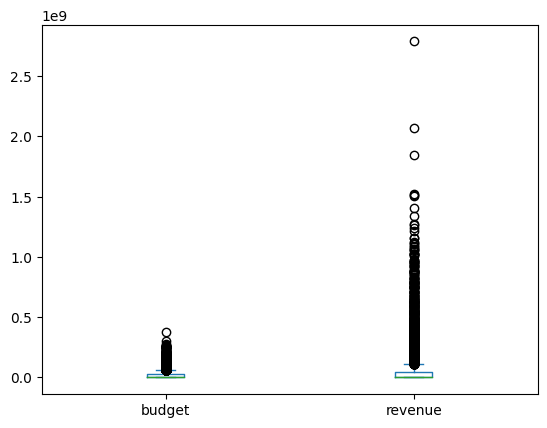

In [74]:
# posible outliers
df[['budget', 'revenue']].plot(kind='box')

**En el gráfico anterior se observa posibles outliers en la columna revenue. Estos valores no son  
concluyentes ya que películas con poco costo, pueden generar altaas ganancias**

<Axes: >

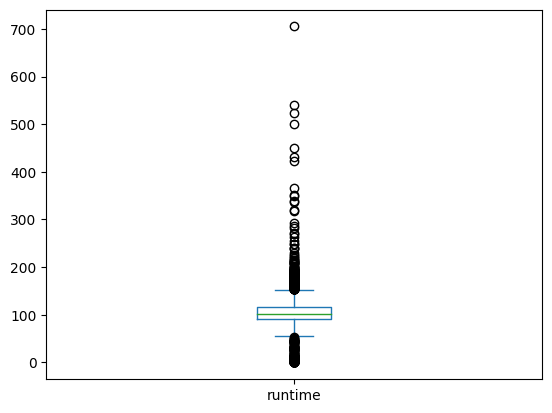

In [76]:
df[['runtime']].plot(kind='box')

<Axes: >

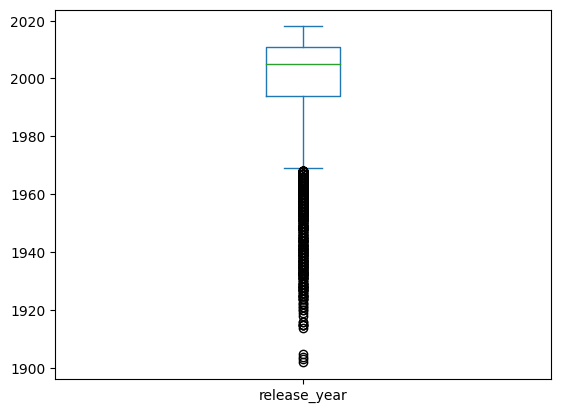

In [77]:
df[['release_year']].plot(kind='box')

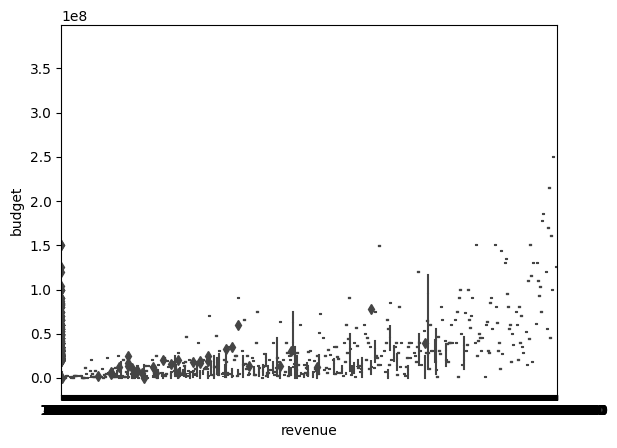

In [69]:
sns.boxplot(x='revenue',y='budget', data=df)
plt.show()

**Arreglo de las columnas escogidas para el modelo**  
En este apartado se procede al arreglo de las columnas escogidas para el modelo de recomendación,  
estas columnas son:  
* **overview:** Descripción de la película
* **genres:** Género de la peĺícula
* **cast:** Actores principales
* **crew:** Director de la película

In [78]:
# dividir las palabras de overview
df["overview"] = df["overview"].apply(lambda x: str(x).split())

# quitamos los espacios entre palabras Ejemplo: Science Fiction = ScienceFiction
df["genres"] = df["genres"].apply(lambda x: [i.replace(" ", "") for i in x])
df["cast"] = df["cast"].apply(lambda x: [i.replace(" ", "") for i in x])
df["crew"] = df["crew"].apply(lambda x: [i.replace(" ", "") for i in x])

In [83]:
# creo la columna tags con el contenido de las columnas overview, genres, cast y crew 
df["tags"] = df["overview"] + df["genres"] + df["cast"] + df["crew"]

In [84]:
df["tags"]

0        [Led, by, Woody,, Andy's, toys, live, happily,...
1        [When, siblings, Judy, and, Peter, discover, a...
3        [Cheated, on,, mistreated, and, stepped, on,, ...
5        [Obsessive, master, thief,, Neil, McCauley, le...
6        [An, ugly, duckling, having, undergone, a, rem...
                               ...                        
45290    [Igor,, a, furniture, store, manager,, tries, ...
45296    [Somewhere, deep,, deep, in, Russia, there, is...
45297    [The, sea,, August,, interesting, and, simple,...
45299    [У, девушки, Даши,, приехавшей, с, подругой, «...
45309    [Failing, to, complete, an, important, assignm...
Name: tags, Length: 8880, dtype: object

In [85]:
# creo el dataset para generar el modelo
new_df = df[["id", "title", "tags"]]

In [86]:
# visualizo el dataframe resultante
new_df

,id,title,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ..."
5,949,Heat,"[Obsessive, master, thief,, Neil, McCauley, le..."
6,11860,Sabrina,"[An, ugly, duckling, having, undergone, a, rem..."
...,...,...,...
45290,293654,Corporate Event,"[Igor,, a, furniture, store, manager,, tries, ..."
45296,100152,Mars,"[Somewhere, deep,, deep, in, Russia, there, is..."
45297,62757,Savages,"[The, sea,, August,, interesting, and, simple,..."
45299,63281,Pro Lyuboff,"[У, девушки, Даши,, приехавшей, с, подругой, «..."


In [ ]:
# exporto el dataframe, en este caso con extensión .parquet para reducir el tamaño
new_df.to_parquet('datasets/datasets_modelos/movies_model.parquet')

In [87]:
# elimino de la memoria
del df

In [89]:
# visualizo el dataframe resultante
new_df.head()

,id,title,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ..."
5,949,Heat,"[Obsessive, master, thief,, Neil, McCauley, le..."
6,11860,Sabrina,"[An, ugly, duckling, having, undergone, a, rem..."


In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8880 entries, 0 to 45309
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8880 non-null   int64 
 1   title   8880 non-null   object
 2   tags    8880 non-null   object
dtypes: int64(1), object(2)
memory usage: 277.5+ KB
